In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import utils
import preprocessing
importlib.reload(utils)
importlib.reload(preprocessing)
import gower
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [2]:
# Load data
df = preprocessing.load_dataset()

<Axes: >

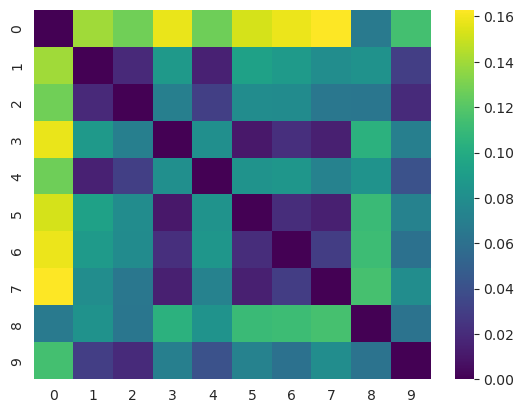

In [3]:
distance_matrix = gower.gower_matrix(df)
sns.heatmap(distance_matrix[:10,:10], cmap='viridis')

For k=4, the number of outliers is 480, the plot is below


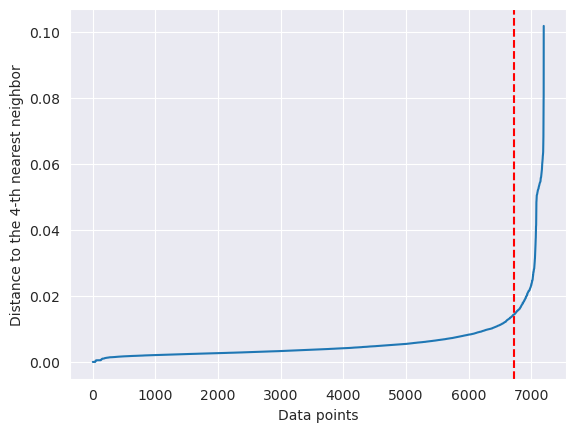

For k=5, the number of outliers is 278, the plot is below


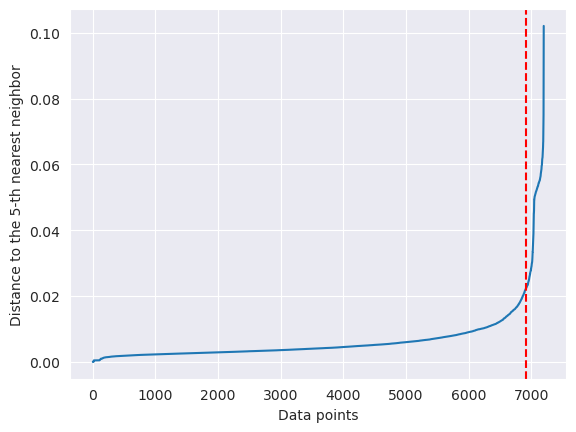

For k=6, the number of outliers is 365, the plot is below


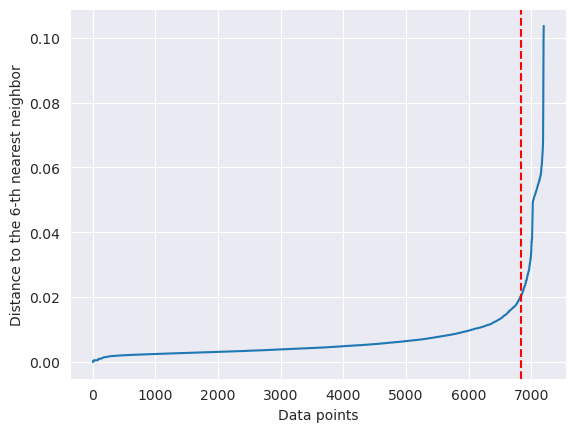

For k=7, the number of outliers is 433, the plot is below


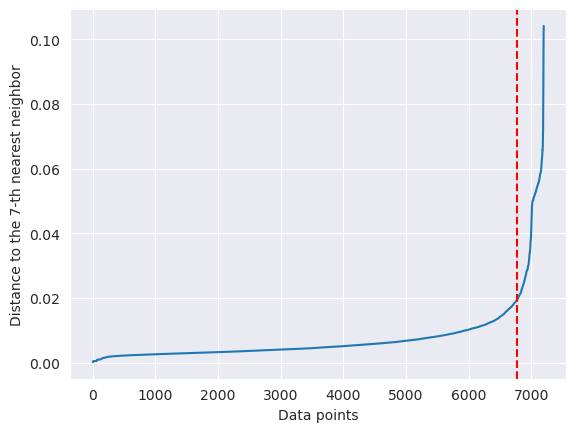

For k=8, the number of outliers is 452, the plot is below


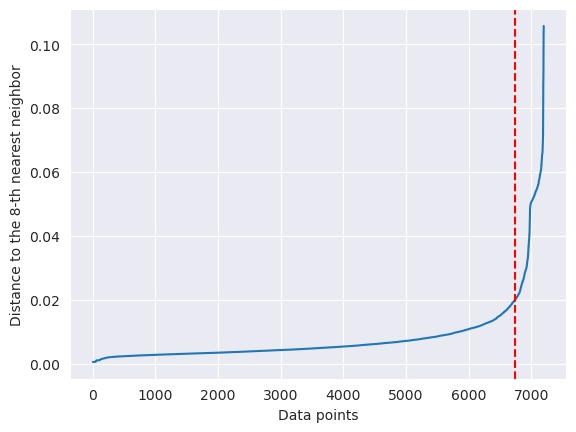

For k=9, the number of outliers is 437, the plot is below


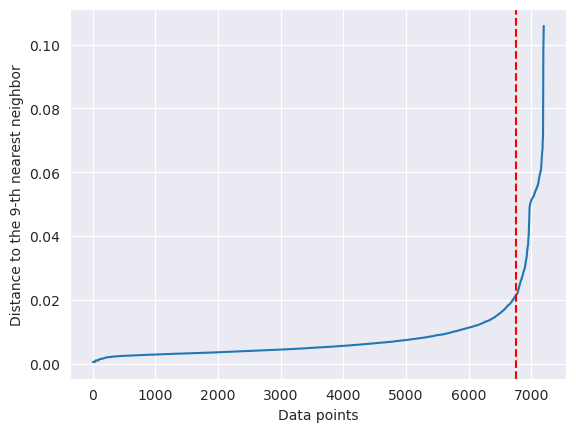

For k=10, the number of outliers is 601, the plot is below


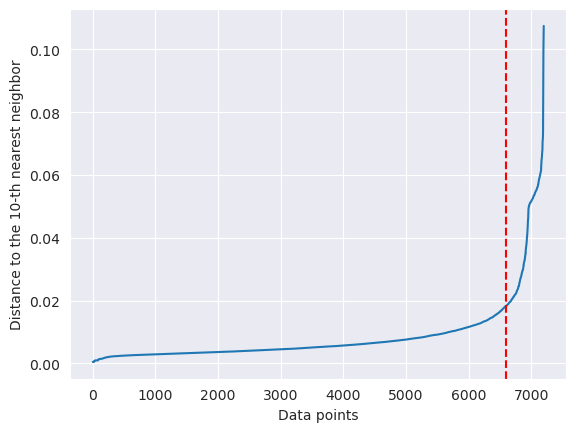

For k=11, the number of outliers is 556, the plot is below


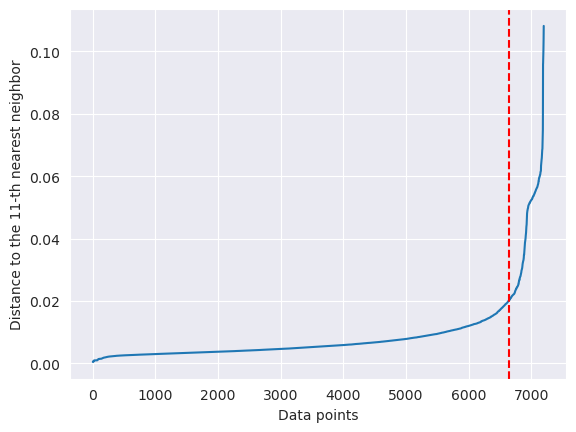

For k=12, the number of outliers is 820, the plot is below


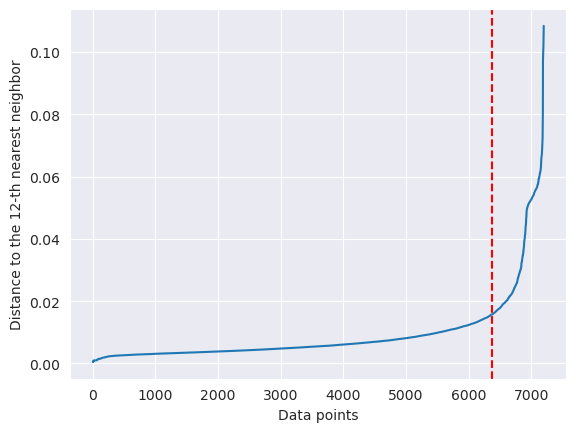

For k=13, the number of outliers is 699, the plot is below


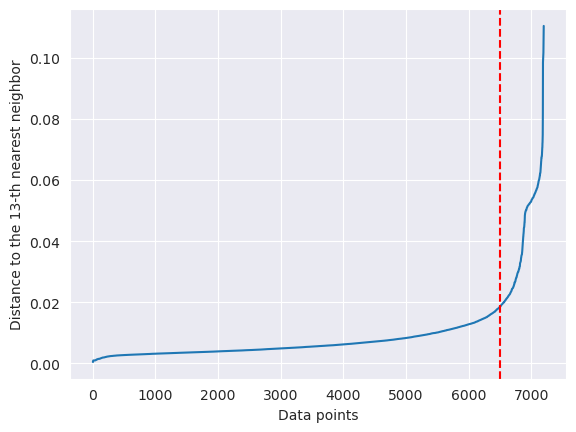

For k=14, the number of outliers is 238, the plot is below


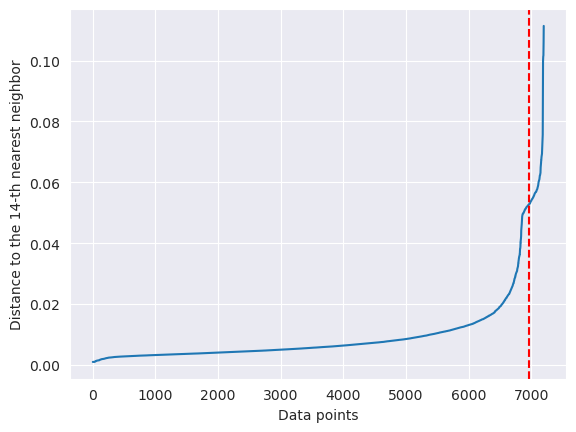

For k=15, the number of outliers is 249, the plot is below


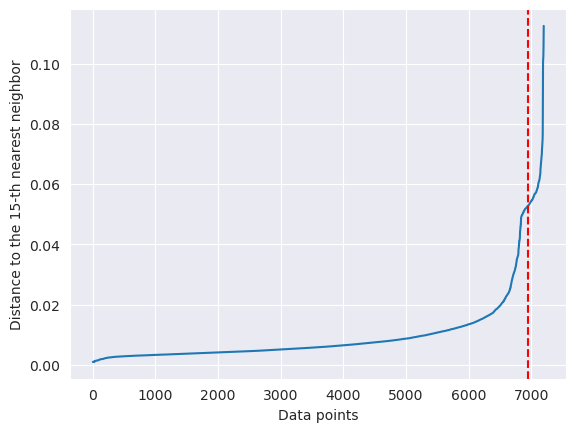

For k=16, the number of outliers is 318, the plot is below


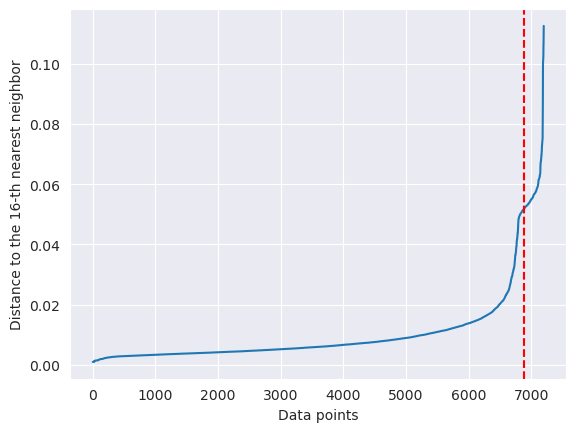

For k=17, the number of outliers is 240, the plot is below


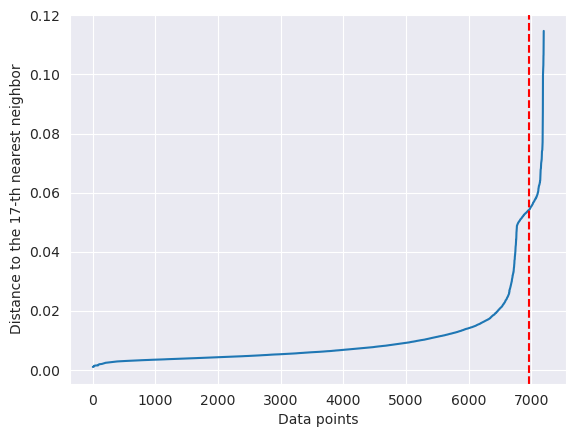

For k=18, the number of outliers is 347, the plot is below


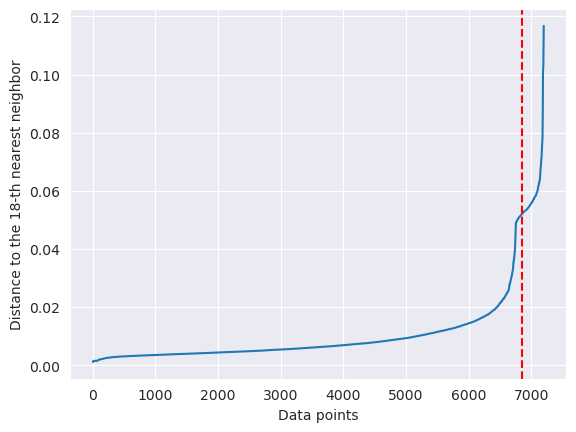

For k=19, the number of outliers is 311, the plot is below


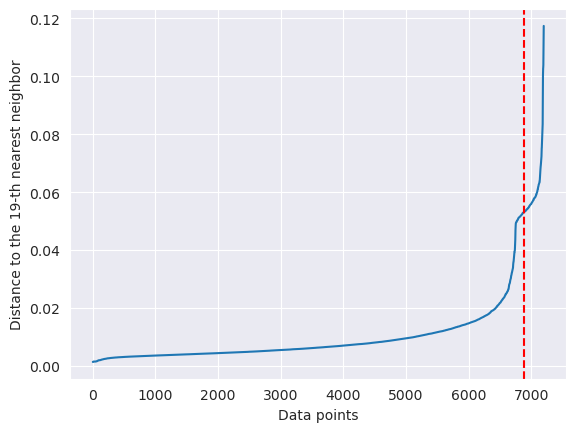

In [12]:
# Initialize a list to store the number of outliers for each k
outliers_count = []

# Loop through values of k from 2 to 49
for k in range(4, 20):
    # Initialize the NearestNeighbors model with precomputed distances
    neigh = NearestNeighbors(n_neighbors=k, metric='precomputed')
    
    # Fit the model to the distance matrix
    neigh.fit(distance_matrix)
    
    # Compute the distances and indices of the k-th nearest neighbors
    distances, indices = neigh.kneighbors(distance_matrix)
    
    # Extract the distances to the k-th nearest neighbor
    distances_kth = distances[:, -1]
    
    # Sort the distances to the k-th nearest neighbor
    distances_kth_sorted = np.sort(distances_kth)
    
    # Find the knee point
    kl = KneeLocator(np.arange(len(distances_kth_sorted)), 
                     distances_kth_sorted, 
                     S= 3,
                     curve='convex', 
                     direction='increasing')
    
    # Label outliers: points with a distance greater than the knee point distance are considered outliers
    labels = (distances_kth > kl.knee_y) * -1
    
    # Count the number of outliers
    num_outliers = np.sum(labels == -1)
    outliers_count.append(num_outliers)
    
    # Print the number of outliers for the current value of k
    print(f"For k={k}, the number of outliers is {num_outliers}, the plot is below")
    
    plt.plot(distances_kth_sorted)
    plt.xlabel('Data points')
    plt.ylabel(f"Distance to the {k}-th nearest neighbor")
#plt.title(f"Knee method on sorted distances to the {k}-th nearest neighbor")
    plt.axvline(kl.knee, color='red', linestyle='dashed')
    plt.show()

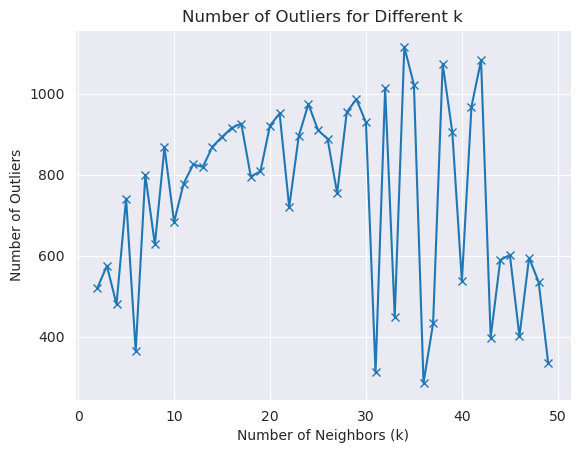

In [48]:
# If desired, plot the number of outliers vs. k
plt.plot(range(2, 50), outliers_count, marker='x')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers for Different k')
plt.grid(True)
plt.show()

For k=10, the number of outliers is 683


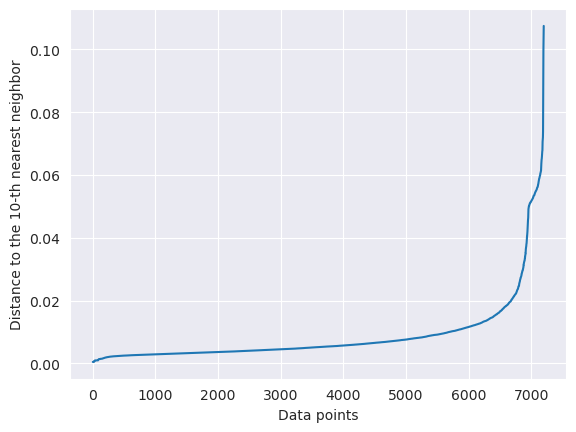

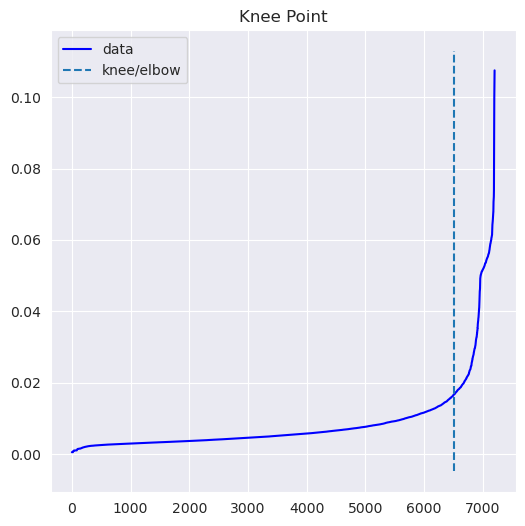

In [55]:
## selected k = 14
  # Initialize the NearestNeighbors model with precomputed distances
k = 10
neigh = NearestNeighbors(n_neighbors=k, metric='precomputed')

# Fit the model to the distance matrix
neigh.fit(distance_matrix)

# Compute the distances and indices of the k-th nearest neighbors
distances, indices = neigh.kneighbors(distance_matrix)

# Extract the distances to the k-th nearest neighbor
distances_kth = distances[:, -1]

# Sort the distances to the k-th nearest neighbor
distances_kth_sorted = np.sort(distances_kth)

# Find the knee point
kl = KneeLocator(np.arange(len(distances_kth_sorted)), 
                 distances_kth_sorted, 
                 S= 5,
                 curve='convex', 
                 direction='increasing')

# Label outliers: points with a distance greater than the knee point distance are considered outliers
labels = (distances_kth > kl.knee_y) * -1

# Count the number of outliers
num_outliers = np.sum(labels == -1)
outliers_count.append(num_outliers)

# Print the number of outliers for the current value of k
print(f"For k={k}, the number of outliers is {num_outliers}")

plt.plot(distances_kth_sorted)
plt.xlabel('Data points')
plt.ylabel(f"Distance to the {k}-th nearest neighbor")
#plt.title(f"Knee method on sorted distances to the {k}-th nearest neighbor")
kl.plot_knee()